In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates
from datetime import datetime
from numpy import array
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import math

In [10]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
#Convert Month object into datetime
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
ts = df['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

# ANN

In [13]:
#Applying min max scaler for better fitting
scaler= MinMaxScaler()
ts=np.array(ts).reshape(-1,1)
ts=scaler.fit_transform(ts)
train_size=int(0.7*len(ts))
test_size=len(ts)-train_size
train=ts[0:train_size,:]
test=ts[train_size:,:]

In [14]:
#Function to create dataset
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
#The below code provides me training and test data
X_train, y_train = get_data(train, look_back)
X_test, y_test = get_data(test, look_back)

In [15]:
#reshaping training data in order to build the model for LSTMs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [25]:
# define model
model1 = keras.Sequential()
model1.add(Dense(100,activation='relu',input_shape = (1,look_back)))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X_train, y_train, epochs=80, batch_size=32, verbose=2)

Epoch 1/80
4/4 - 0s - loss: 0.0579
Epoch 2/80
4/4 - 0s - loss: 0.0450
Epoch 3/80
4/4 - 0s - loss: 0.0350
Epoch 4/80
4/4 - 0s - loss: 0.0270
Epoch 5/80
4/4 - 0s - loss: 0.0214
Epoch 6/80
4/4 - 0s - loss: 0.0168
Epoch 7/80
4/4 - 0s - loss: 0.0134
Epoch 8/80
4/4 - 0s - loss: 0.0109
Epoch 9/80
4/4 - 0s - loss: 0.0093
Epoch 10/80
4/4 - 0s - loss: 0.0082
Epoch 11/80
4/4 - 0s - loss: 0.0078
Epoch 12/80
4/4 - 0s - loss: 0.0075
Epoch 13/80
4/4 - 0s - loss: 0.0074
Epoch 14/80
4/4 - 0s - loss: 0.0072
Epoch 15/80
4/4 - 0s - loss: 0.0070
Epoch 16/80
4/4 - 0s - loss: 0.0068
Epoch 17/80
4/4 - 0s - loss: 0.0066
Epoch 18/80
4/4 - 0s - loss: 0.0065
Epoch 19/80
4/4 - 0s - loss: 0.0063
Epoch 20/80
4/4 - 0s - loss: 0.0062
Epoch 21/80
4/4 - 0s - loss: 0.0060
Epoch 22/80
4/4 - 0s - loss: 0.0059
Epoch 23/80
4/4 - 0s - loss: 0.0057
Epoch 24/80
4/4 - 0s - loss: 0.0056
Epoch 25/80
4/4 - 0s - loss: 0.0055
Epoch 26/80
4/4 - 0s - loss: 0.0053
Epoch 27/80
4/4 - 0s - loss: 0.0052
Epoch 28/80
4/4 - 0s - loss: 0.0051
E

In [26]:
trainScore = model1.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model1.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.05 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


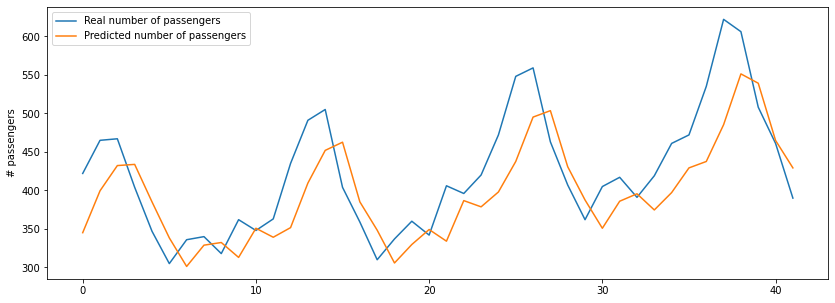

In [27]:
y_pred = model1.predict(X_test)
y_pred1=y_pred.reshape(-1,1)
#inverse transform because I wanted to plot actual values and not the normalized ones
y_pred1 = scaler.inverse_transform(y_pred1)
y_test1=y_test.reshape(-1,1)
y_test1 = scaler.inverse_transform(y_test1)
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test1, label = 'Real number of passengers')
plt.plot(y_pred1, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

# Convolutional Neural Networks

In [28]:
# define model
model2 = Sequential()
model2.add(Conv1D(filters=10, kernel_size=1, activation='relu', input_shape=(1,look_back)))
model2.add(Flatten())
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X_train, y_train,batch_size=32 ,epochs=40, verbose=1)

Epoch 1/40
4/4 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 3/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 4/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 5/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 6/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 8/40
4/4 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 9/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 12/40
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 13/40
4/4 [==============================] - 0s 3ms/step - loss: 0.

In [29]:
trainScore = model2.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model2.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.05 RMSE)
Test Score: 0.01 MSE (0.11 RMSE)


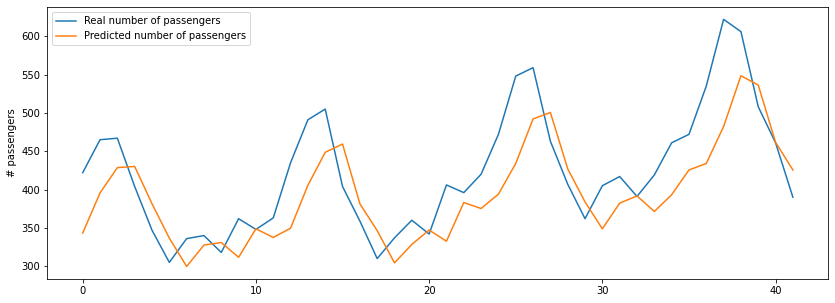

In [30]:
y_pred = model2.predict(X_test)
y_pred2=y_pred.reshape(-1,1)
y_pred2 = scaler.inverse_transform(y_pred2)
y_test2=y_test.reshape(-1,1)
y_test2 = scaler.inverse_transform(y_test2)
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test2, label = 'Real number of passengers')
plt.plot(y_pred2, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

# LSTMs

In [31]:
# define model
from keras.layers import LSTM
model3 = Sequential()
model3.add(LSTM(40, activation='relu', input_shape=(1,look_back)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='Adam', loss='mse')
# fit model
model3.fit(X_train, y_train,batch_size=32, epochs=80, verbose=1)
# Estimate model performance and plots

Epoch 1/80
4/4 [==============================] - 1s 3ms/step - loss: 0.0721
Epoch 2/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0617
Epoch 3/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0580
Epoch 4/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 5/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 6/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 7/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 8/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 9/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 10/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 11/80
4/4 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 12/80
4/4 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 13/80
4/4 [==============================] - 0s 3ms/step - loss: 0.

In [32]:
trainScore = model3.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model3.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.05 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


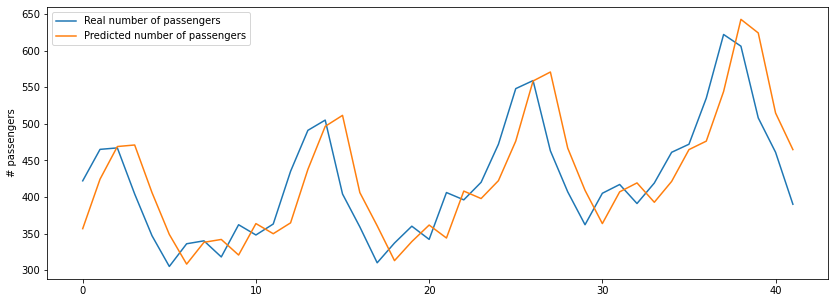

In [33]:
y_pred = model3.predict(X_test)
y_pred3= y_pred.reshape(-1,1)
y_pred3 = scaler.inverse_transform(y_pred3)
y_test3=y_test.reshape(-1,1)
y_test3 = scaler.inverse_transform(y_test3)
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test3, label = 'Real number of passengers')
plt.plot(y_pred3, label = 'Predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

### LSTM gave the best predictions.